In [675]:

import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from matplotlib import patches
from sklearn.impute import KNNImputer
from manager import manager
from sklearn.compose import ColumnTransformer
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import statsmodels.api as sm



Caricamento di Train-test e Test-set

In [676]:
trainset = pd.read_csv("./house-prices-advanced-regression-techniques/train.csv")
lenght_trainset = trainset.shape
#print(lenght_trainset)
#lenght
trainset.head(10)
testset = pd.read_csv("./house-prices-advanced-regression-techniques/test.csv")
lenght_testset = testset.shape
#print(lenght_testset)
#testset

L'idea adesso è vedere quali features nel testset non sono presenti nel trainset e viceversa, essendo la dimensione delle colonne diversa

In [677]:
#check if every feature in trainset is also present in testset and viceversa
notInTestset = []
notInTrainset = []
for x in trainset.columns:
    if not testset.columns.__contains__(x):
        notInTestset.append(x)
print(f"Columns in trainset but not in testset: {notInTestset} \n")
for x in testset.columns:
    if not trainset.columns.__contains__(x):
        notInTrainset.append(x)
print(f"Columns in testset but not in trainset: {notInTrainset} \n")
        


Columns in trainset but not in testset: ['SalePrice'] 

Columns in testset but not in trainset: [] 



In [678]:
#info of trainset
trainset_info = trainset.info()
print(trainset_info)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [679]:
#info of testset
testset_info = testset.info()
print(testset_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

eliminazione della feature id perchè non rilevante 

In [680]:
#delete feature "ID" from trainset beacause it is not relevant
if "Id" in trainset.columns:
    trainset.drop(["Id"], axis="columns", inplace=True)

#delete feature "ID" from testset and save it
if "Id" in testset.columns:
    idList = testset['Id'].tolist()
    testset.drop(['Id'], axis="columns", inplace=True)
print(trainset.shape)
    

(1460, 80)


divisione di trainset e target

In [681]:
target = trainset.iloc[:, len(trainset.columns)-1]
target.head(10)
trainset.drop(target.name, axis="columns", inplace=True)
trainset.head(10)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


eliminazione delle righe con più del 50% di valori nan

In [682]:
nanPercInARow = []
for index, row in trainset.iterrows():
    nanPercInARow = trainset.loc[[index]].isna().sum().sum() / len(trainset.columns)
    if nanPercInARow > 0.5:
        trainset.drop(index, axis="rows", inplace=True)
print(len(trainset))


1460


rimozione delle colonne con più del 95% di valori uguali.

In [683]:
#print(trainset.shape)
#print(testset.shape)
for col in trainset.columns:
    if trainset[col].unique().size == 1:
        trainset.drop(col, axis="columns", inplace=True)
    else:
        values = trainset[col].value_counts(dropna=False)
        if len(values)<5:
            #print(values)
            for value in values:
                if float(value) > float(len(trainset)) * 0.95:
                    trainset.drop(col, axis="columns", inplace=True)
                    testset.drop(col,axis="columns", inplace=True)
                    #print(col)
                    #print(value)
                    break
   
print(trainset.shape)     
print(testset.shape)   

        
            
        
for col in testset.columns:
    if testset[col].unique().size == 1:
        testset.drop(col, axis="columns", inplace=True)
    else:
        values = testset[col].value_counts(dropna=False)
        if len(values)<5:
            for value in values:
                if float(value) > float(len(testset)) * 0.95:
                    testset.drop(col, axis="columns", inplace=True)
                    trainset.drop(col,axis="columns", inplace=True)
                    break

print(trainset.shape)     
print(testset.shape)  
#print(trainset)

(1460, 75)
(1459, 75)
(1460, 71)
(1459, 71)


Parsing del dataset.
features numeriche
features categoriche.


In [684]:
#parsing trainset
print(trainset.shape)
trainset_num = trainset.select_dtypes(include=[np.number])
trainset_cat = trainset.select_dtypes(exclude=[np.number])



#parsing testset
testset_num = testset.select_dtypes(include=[np.number])
testset_cat = testset.select_dtypes(exclude=[np.number])
#print(trainset_cat.columns)
#print(trainset_num.columns)
print(trainset_num.shape)
print(trainset_cat.shape)

(1460, 71)
(1460, 35)
(1460, 36)


abbiamo 36 variabili numeriche indipendenti nel testset_num

encoding categorical features

In [685]:
#concatenazione testset_cat e trainset_cat per avere stesso encoding

lastTrainsetIndex = len(trainset_cat)-1
print(trainset_cat.shape)
print(testset_cat.shape)

df_cat =pd.concat([trainset_cat, testset_cat])

df_cat.shape

(1460, 36)
(1459, 36)


(2919, 36)

In [686]:
#encoding trainset
featureToEncode = []
for col in df_cat.columns:
    featureToEncode.append(col)
    #print(str(col)+ "\n")
    #print(trainset_cat[col].unique())
    #trainset_cat[col] = trainset_cat[col].astype['category']

le = LabelEncoder()
for col in df_cat.select_dtypes(include='O').columns:
    #df_cat[col]=le.fit_transform(df_cat[col])
    df_cat_dummies = pd.get_dummies(df_cat)
#encoder = OneHotEncoder(drop="first")

#df_cat_encoded = encoder.fit_transform(df_cat)
#df_cat = pd.DataFrame(df_cat_encoded.toarray(), columns=encoder.get_feature_names(), index=df_cat.index)

#split del df_cat in trainset_cat e testset_cat dopo l'encoding

trainset_cat_encoded = df_cat_dummies.iloc[:lastTrainsetIndex + 1 , :]
testset_cat_encoded = df_cat_dummies.iloc[lastTrainsetIndex + 1: , :]

#concatenazione di trainset_num e trainset_cat dopo l'encoding

#trainset = pd.concat([trainset_num, trainset_cat], axis="columns")


#concatenazione di trainset_num e trainset_cat dopo l'encoding

#testset = pd.concat([testset_num, testset_cat], axis="columns")


print(trainset_cat_encoded.shape)
print(testset_cat_encoded.shape)

    

(1460, 224)
(1459, 224)


gestione dei nan: utilizzo di knn

In [687]:
#nan management
trainset_num.isna().sum()
#use knn
imputer = KNNImputer(n_neighbors=1, weights="uniform")
trainset_num_imputed = trainset_num
testset_num_imputed = testset_num
trainset_num_imputed = pd.DataFrame(imputer.fit_transform(trainset_num))
trainset_num_imputed.columns = trainset_num.columns
testset_num_imputed = pd.DataFrame(imputer.fit_transform(testset_num))
testset_num_imputed.columns = testset_num.columns



In [688]:
#trainset_num.isna().sum()
print(trainset_num_imputed.shape)
print(testset_num_imputed.shape)
print(trainset_num_imputed.columns)

(1460, 35)
(1459, 35)
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')


correlazione

In [689]:
trainset_num_conc =pd.concat([trainset_num_imputed, target], axis="columns")
correlation_matrix = trainset_num_conc.corr()

plt.figure(figsize=(15, 16), dpi=160)
#sns.heatmap(correlation_matrix, cmap="bwr")
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "6pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "10pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '80px'),
                        ('font-size', '10pt')])
]

correlation_matrix.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '40px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.00,-0.35,-0.14,0.03,-0.06,0.03,0.04,0.03,-0.07,-0.07,-0.14,-0.24,-0.25,0.31,0.05,0.07,0.00,-0.00,0.13,0.18,-0.02,0.04,-0.05,0.07,-0.04,-0.10,-0.01,-0.01,-0.01,-0.04,-0.03,0.01,-0.01,-0.01,-0.02,-0.08
LotFrontage,-0.35,1.00,0.38,0.20,-0.04,0.09,0.05,0.16,0.22,0.08,0.09,0.35,0.41,0.09,0.03,0.38,0.09,0.03,0.19,0.06,0.26,0.32,0.24,0.05,0.25,0.31,0.10,0.12,0.04,0.06,0.06,0.14,0.01,0.02,0.02,0.32
LotArea,-0.14,0.38,1.00,0.11,-0.01,0.01,0.01,0.10,0.21,0.11,-0.00,0.26,0.30,0.05,0.00,0.26,0.16,0.05,0.13,0.01,0.12,0.19,0.27,-0.01,0.15,0.18,0.17,0.08,-0.02,0.02,0.04,0.08,0.04,0.00,-0.01,0.26
OverallQual,0.03,0.20,0.11,1.00,-0.09,0.57,0.55,0.41,0.24,-0.06,0.31,0.54,0.48,0.30,-0.03,0.59,0.11,-0.04,0.55,0.27,0.10,0.43,0.40,0.54,0.60,0.56,0.24,0.31,-0.11,0.03,0.06,0.07,-0.03,0.07,-0.03,0.79
OverallCond,-0.06,-0.04,-0.01,-0.09,1.00,-0.38,0.07,-0.13,-0.05,0.04,-0.14,-0.17,-0.14,0.03,0.03,-0.08,-0.05,0.12,-0.19,-0.06,0.01,-0.06,-0.02,-0.30,-0.19,-0.15,-0.00,-0.03,0.07,0.03,0.05,-0.00,0.07,-0.00,0.04,-0.08
YearBuilt,0.03,0.09,0.01,0.57,-0.38,1.00,0.59,0.31,0.25,-0.05,0.15,0.39,0.28,0.01,-0.18,0.20,0.19,-0.04,0.47,0.24,-0.07,0.10,0.15,0.80,0.54,0.48,0.22,0.19,-0.39,0.03,-0.05,0.00,-0.03,0.01,-0.01,0.52
YearRemodAdd,0.04,0.05,0.01,0.55,0.07,0.59,1.00,0.18,0.13,-0.07,0.18,0.29,0.24,0.14,-0.06,0.29,0.12,-0.01,0.44,0.18,-0.04,0.19,0.11,0.61,0.42,0.37,0.21,0.23,-0.19,0.05,-0.04,0.01,-0.01,0.02,0.04,0.51
MasVnrArea,0.03,0.16,0.10,0.41,-0.13,0.31,0.18,1.00,0.27,-0.07,0.11,0.36,0.34,0.17,-0.07,0.39,0.09,0.03,0.27,0.20,0.10,0.28,0.25,0.26,0.36,0.37,0.16,0.13,-0.11,0.02,0.06,0.01,-0.03,-0.00,-0.01,0.48
BsmtFinSF1,-0.07,0.22,0.21,0.24,-0.05,0.25,0.13,0.27,1.00,-0.05,-0.50,0.52,0.45,-0.14,-0.06,0.21,0.65,0.07,0.06,0.00,-0.11,0.04,0.26,0.16,0.22,0.30,0.20,0.11,-0.10,0.03,0.06,0.14,0.00,-0.02,0.01,0.39
BsmtFinSF2,-0.07,0.08,0.11,-0.06,0.04,-0.05,-0.07,-0.07,-0.05,1.00,-0.21,0.10,0.10,-0.10,0.01,-0.01,0.16,0.07,-0.08,-0.03,-0.02,-0.04,0.05,-0.07,-0.04,-0.02,0.07,0.00,0.04,-0.03,0.09,0.04,0.00,-0.02,0.03,-0.01


<Figure size 2400x2560 with 0 Axes>

analisi della correlazione con "SalePrice"
• se |corr|>0.80 strong correlation
• se 0.5<|corr|<0.80 moderate correlation
• se 0.20<|corr|<0.5 weak correlation
• se |corr|<0.2 very weak or null correlation

In [690]:
target_correlation = trainset_num_conc.corr()[target.name][:-1]
target_correlation

MSSubClass      -0.084284
LotFrontage      0.316983
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.475611
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.492040
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
Name: SalePrice, dtype: float64

In [691]:
#find features with a very weak correlations 
very_weak_corr = target_correlation[abs(target_correlation)<0.25].sort_values(ascending=False)
#print something
very_weak_corr_names = target_correlation[abs(target_correlation)<0.25].index.tolist()
#print(very_weak_corr_names)

#find features with a weak correlations
weak_corr = target_correlation[(abs(target_correlation)>=0.25) & (abs(target_correlation)<0.50)].sort_values(ascending=False)
#print something
weak_corr_list = target_correlation[(abs(target_correlation)>=0.25) & (abs(target_correlation)<0.50)].index.tolist()

#find features with a moderate correlations
moderate_corr = target_correlation[(abs(target_correlation)>=0.50) & (abs(target_correlation)<0.75)].sort_values(ascending=False)
moderate_corr_list = target_correlation[(abs(target_correlation)>=0.50) & (abs(target_correlation)<0.75)].index.tolist()
#print(moderate_corr)

#find features with a strong correlations
strong_corr = target_correlation[(abs(target_correlation)>=0.75)].sort_values(ascending=False)
strong_corr_list = target_correlation[(abs(target_correlation)>=0.75)].index.tolist()
#print(strong_corr)



In [692]:
#trainset and testset with only correlated feature
trainset_num_corr = trainset_num_conc.loc[:, strong_corr_list + moderate_corr_list + weak_corr_list + [target.name]]
testset_num_corr = testset_num_imputed.loc[:, strong_corr_list + moderate_corr_list + weak_corr_list]

print(trainset_num_corr.shape)
print(testset_num_corr.shape)

trainset_num_corr.head(10)


(1460, 21)
(1459, 20)


,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,LotArea,MasVnrArea,BsmtFinSF1,2ndFlrSF,HalfBath,Fireplaces,GarageYrBlt,WoodDeckSF,OpenPorchSF,SalePrice
0,7.0,2003.0,2003.0,856.0,856.0,1710.0,2.0,8.0,2.0,548.0,...,8450.0,196.0,706.0,854.0,1.0,0.0,2003.0,0.0,61.0,208500
1,6.0,1976.0,1976.0,1262.0,1262.0,1262.0,2.0,6.0,2.0,460.0,...,9600.0,0.0,978.0,0.0,0.0,1.0,1976.0,298.0,0.0,181500
2,7.0,2001.0,2002.0,920.0,920.0,1786.0,2.0,6.0,2.0,608.0,...,11250.0,162.0,486.0,866.0,1.0,1.0,2001.0,0.0,42.0,223500
3,7.0,1915.0,1970.0,756.0,961.0,1717.0,1.0,7.0,3.0,642.0,...,9550.0,0.0,216.0,756.0,0.0,1.0,1998.0,0.0,35.0,140000
4,8.0,2000.0,2000.0,1145.0,1145.0,2198.0,2.0,9.0,3.0,836.0,...,14260.0,350.0,655.0,1053.0,1.0,1.0,2000.0,192.0,84.0,250000
5,5.0,1993.0,1995.0,796.0,796.0,1362.0,1.0,5.0,2.0,480.0,...,14115.0,0.0,732.0,566.0,1.0,0.0,1993.0,40.0,30.0,143000
6,8.0,2004.0,2005.0,1686.0,1694.0,1694.0,2.0,7.0,2.0,636.0,...,10084.0,186.0,1369.0,0.0,0.0,1.0,2004.0,255.0,57.0,307000
7,7.0,1973.0,1973.0,1107.0,1107.0,2090.0,2.0,7.0,2.0,484.0,...,10382.0,240.0,859.0,983.0,1.0,2.0,1973.0,235.0,204.0,200000
8,7.0,1931.0,1950.0,952.0,1022.0,1774.0,2.0,8.0,2.0,468.0,...,6120.0,0.0,0.0,752.0,0.0,2.0,1931.0,90.0,0.0,129900
9,5.0,1939.0,1950.0,991.0,1077.0,1077.0,1.0,5.0,1.0,205.0,...,7420.0,0.0,851.0,0.0,0.0,2.0,1939.0,0.0,4.0,118000


ouliers detection univariata

In [693]:
def detect_outliers_zscore(data):
    thres = 3
    outliers = []
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code

print("{:<30}{:<20}".format("Feature", "Percentage of ouliers"))
percentageOutliers = []
for col in trainset_num_corr.columns[:-1]:   
    sample_outliers = detect_outliers_zscore(trainset_num_corr.iloc[:][col])
    percentageOutliers.append((len(sample_outliers)/len(trainset_num_corr))*100)
    print("{:<30}{:<20}".format(col, str((len(sample_outliers)/len(trainset_num_corr))*100)) + " %")
    
print("Max Percentage: " + str(max(percentageOutliers))+ " %")
    
    

Feature                       Percentage of ouliers
OverallQual                   0.136986301369863    %
YearBuilt                     0.410958904109589    %
YearRemodAdd                  0.0                  %
TotalBsmtSF                   0.684931506849315    %
1stFlrSF                      0.821917808219178    %
GrLivArea                     1.095890410958904    %
FullBath                      0.0                  %
TotRmsAbvGrd                  0.821917808219178    %
GarageCars                    0.0                  %
GarageArea                    0.4794520547945206   %
LotFrontage                   1.095890410958904    %
LotArea                       0.8904109589041096   %
MasVnrArea                    2.191780821917808    %
BsmtFinSF1                    0.410958904109589    %
2ndFlrSF                      0.273972602739726    %
HalfBath                      0.821917808219178    %
Fireplaces                    0.3424657534246575   %
GarageYrBlt                   0.068493150684931

plot delle feature. check normality by plotting a frequency distribution, also called a histogram, of the data and visually comparing it to a normal distribution

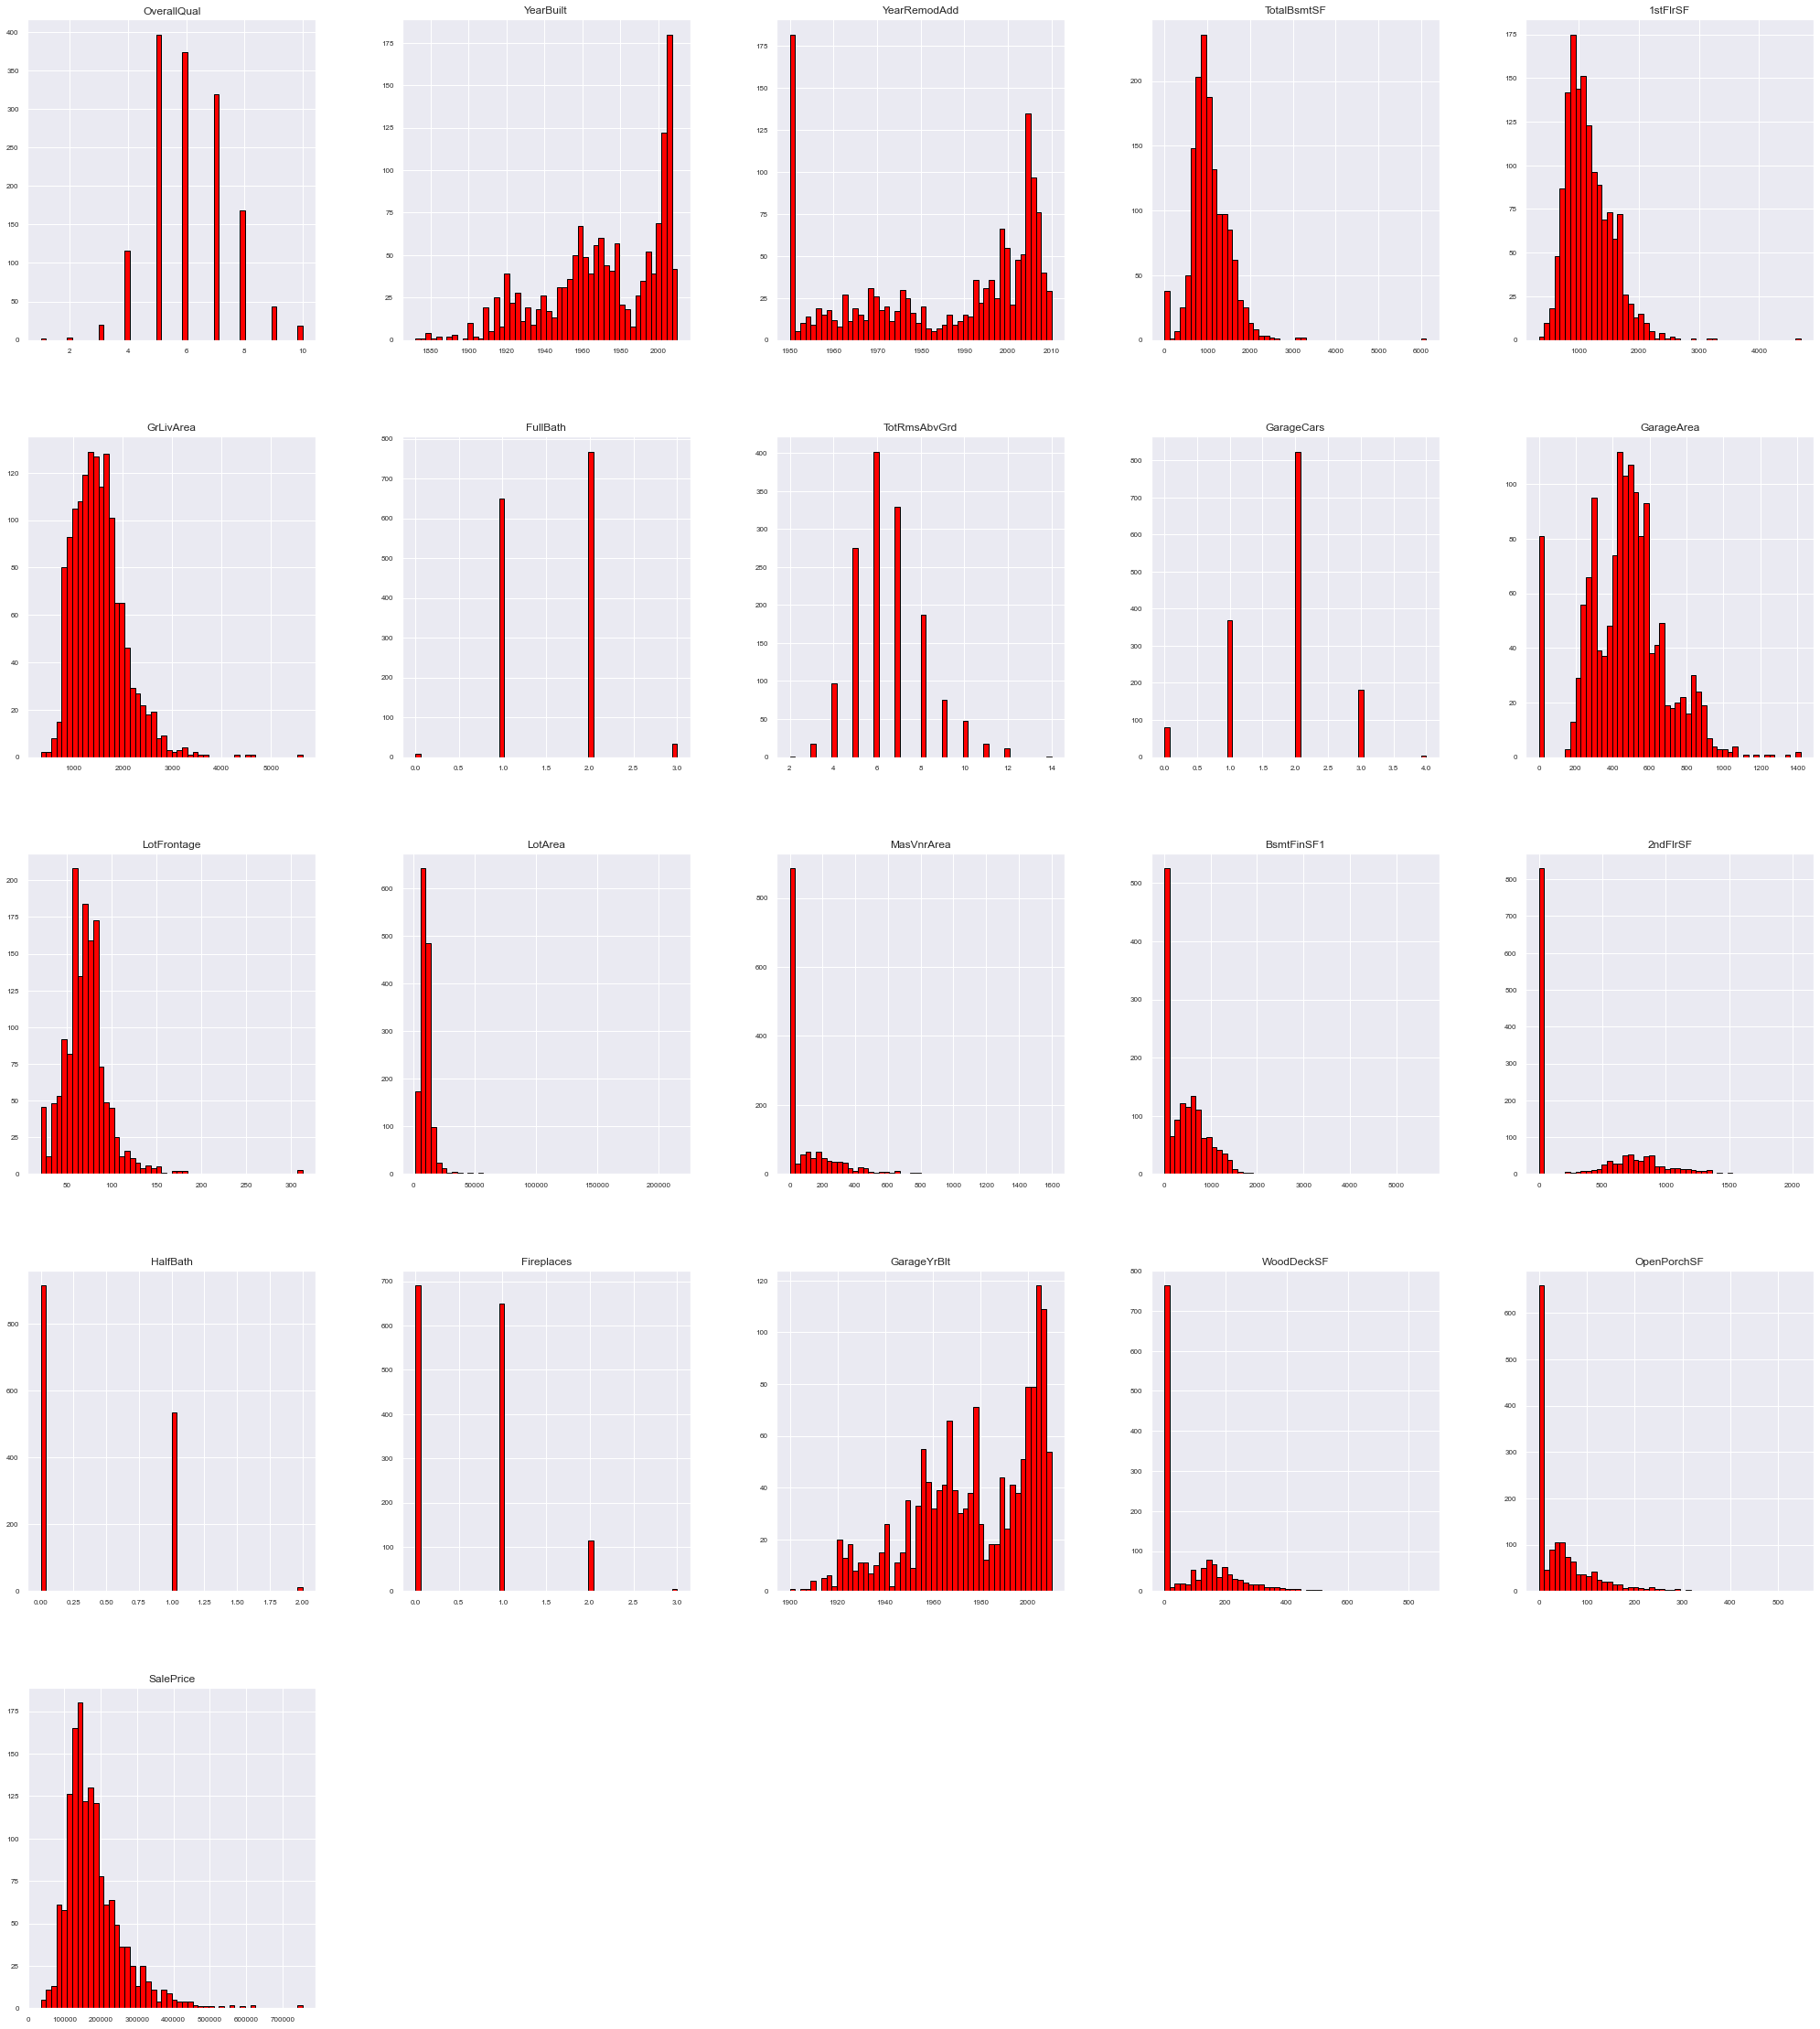

In [697]:
plot = trainset_num_corr.hist(figsize=(35,40), bins=50, color="red", edgecolor="black", xlabelsize=8, ylabelsize=8)
    

dai grafici si può notare che non tutte le feature hanno una distribuzione normale, di conseguenza è meglio utilizzare l'Inter Quantile Range (IQR) rule per il rilevamento degli outlier

In [698]:

def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code


print("Outliers from IQR method: ", sample_outliers)


print("{:<30}{:<20}".format("Feature", "Percentage of ouliers"))
percentageOutliers = []
for col in trainset_num_corr.columns[:-1]:   
    sample_outliers = detect_outliers_iqr(trainset_num_corr.iloc[:][col])
    percentageOutliers.append((len(sample_outliers)/len(trainset_num_corr))*100)
    print("{:<30}{:<20}".format(col, str((len(sample_outliers)/len(trainset_num_corr))*100)) + " %")
    
print("Max Percentage: " + str(max(percentageOutliers))+ " %")

Outliers from IQR method:  [258.0, 260.0, 250.0, 523.0, 285.0, 406.0, 502.0, 274.0, 312.0, 267.0, 265.0, 288.0, 341.0, 247.0, 291.0, 312.0, 418.0, 364.0, 252.0, 282.0, 319.0, 263.0, 304.0, 287.0, 292.0, 547.0, 262.0]
Feature                       Percentage of ouliers
OverallQual                   0.136986301369863    %
YearBuilt                     0.4794520547945206   %
YearRemodAdd                  0.0                  %
TotalBsmtSF                   4.178082191780822    %
1stFlrSF                      1.36986301369863     %
GrLivArea                     2.1232876712328768   %
FullBath                      0.0                  %
TotRmsAbvGrd                  2.054794520547945    %
GarageCars                    0.3424657534246575   %
GarageArea                    1.4383561643835616   %
LotFrontage                   7.739726027397261    %
LotArea                       4.726027397260274    %
MasVnrArea                    6.6438356164383565   %
BsmtFinSF1                    0.4794520547

Problema: valori troppo alti di percentuale di outliers, utlizzo un'outlier detection bivariata.